# Parks

## Description
We utilized the "Pittsburgh Public Schools Enrollment by Individualized Education Plan" dataset to assess the academic performance of K-12 students in each neighborhood in Pittsburgh, assuming that better neighborhoods have better students. We used the sort_values() function to rank the neighborhoods based on their population of gifted students.

In [1]:
import pandas as pd
edu = pd.read_csv('datasets/education.csv')
edu.head()

,neighborhoods,gifted,other_iep,not_iep_or_gifted,total_enrollment_k_12
0,Allegheny Center,12,89,250,351
1,Allegheny West,12,89,250,351
2,California Kirkbride,12,89,250,351
3,Chateau,12,89,250,351
4,Manchester,12,89,250,351


In [2]:
edu['neighborhoods'] = edu['neighborhoods'].str.split(', ')
edu = edu.explode('neighborhoods')

gifted = edu.sort_values(by='gifted', ascending = False)
top20_neighborhood = gifted.iloc[:20]

print(top20_neighborhood)

            neighborhoods  gifted  other_iep  not_iep_or_gifted  \
79          Regent Square     242         69                440   
80         Swisshelm Park     242         69                440   
78    Squirrel Hill South     242         69                440   
21              Brookline     119        203                790   
77    Squirrel Hill North     108         20                200   
68           Point Breeze      97         32                177   
41             Greenfield      85         59                327   
47          Highland Park      83         45                254   
22                Carrick      60        265                887   
12              Beechview      44        166                540   
14             Friendship      43         50                198   
13             Bloomfield      43         50                198   
20       Brighton Heights      39        130                397   
39                Larimer      37        168                50

## Graph
The graph below visually shows the top 20 neighborhoods that appear in the dataset.

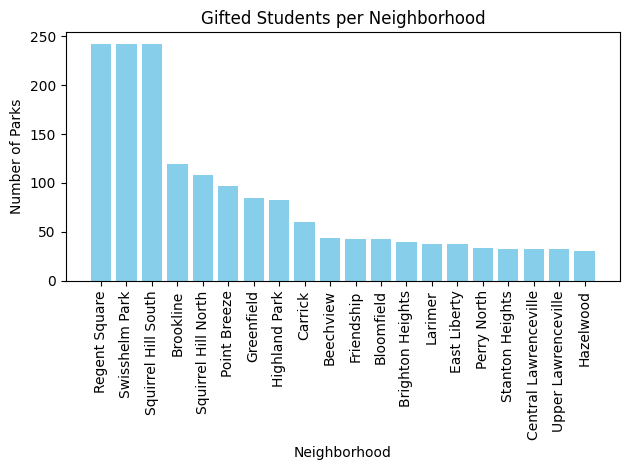

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.title('Gifted Students per Neighborhood')
plt.bar(top20_neighborhood['neighborhoods'], top20_neighborhood['gifted'], color='skyblue')
plt.xlabel("Neighborhood")
plt.ylabel("Number of Parks")
plt.xticks(rotation=90)
plt.tight_layout()

# Map
The following map shows the distribution of neighborhoods in Pittsburgh. Deeper color represents more gifted students.

<Axes: >

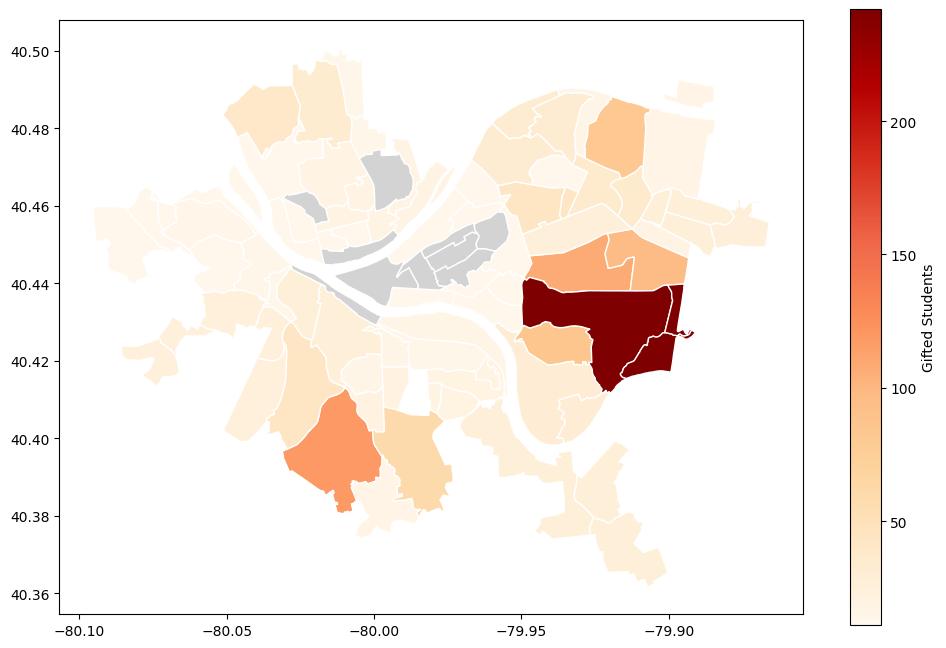

In [4]:
import geopandas

neighborhoods = geopandas.read_file("neighborhoods/neighborhoods.shp")
edu_map = neighborhoods.merge(
    edu,
    left_on='hood',
    right_on='neighborhoods',
    how='left'
)
edu_map[['hood','gifted','geometry']].head()

edu_map.plot(column='gifted',
               cmap='OrRd',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Gifted Students"},
               figsize=(12, 8),
               missing_kwds={"color": "lightgrey"}
               )